# Changing Seasonality

In [77]:
import numpy as np
import pandas as pd

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

from sklearn.metrics import mean_squared_error

In [78]:
df= pd.read_csv("airline_passengers.csv")

In [79]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [80]:
df.columns = ["ds", "y"]

In [81]:
df["ds"] = pd.to_datetime(df["ds"])

In [82]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<AxesSubplot:xlabel='ds'>

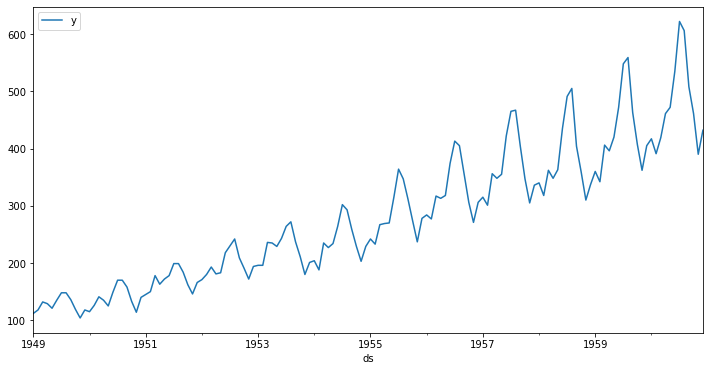

In [84]:
df.plot(x= "ds", y= "y", figsize= (12,6))

### Train Test Split:

In [85]:
len(df)

144

In [86]:
train_data = df[:120]

In [87]:
test_data = df[120:]

In [88]:
train_data.shape

(120, 2)

In [89]:
test_data.shape

(24, 2)

### Prophet Model With Additive Seasonality:

In [90]:
model1 = Prophet()

In [91]:
model1.fit(train_data)

03:35:13 - cmdstanpy - INFO - Chain [1] start processing
03:35:13 - cmdstanpy - INFO - Chain [1] done processing


In [92]:
future_df = model1.make_future_dataframe(periods= 24, freq= "MS")

In [93]:
forecast = model1.predict(future_df)

In [94]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,109.305735,65.969239,112.358464,109.305735,109.305735,-20.084352,-20.084352,-20.084352,-20.084352,-20.084352,-20.084352,0.0,0.0,0.0,89.221383
1,1949-02-01,111.458230,59.923482,106.339405,111.458230,111.458230,-28.128645,-28.128645,-28.128645,-28.128645,-28.128645,-28.128645,0.0,0.0,0.0,83.329586
2,1949-03-01,113.402420,95.339936,141.386382,113.402420,113.402420,4.834022,4.834022,4.834022,4.834022,4.834022,4.834022,0.0,0.0,0.0,118.236442
3,1949-04-01,115.554915,88.977082,134.117478,115.554915,115.554915,-4.862678,-4.862678,-4.862678,-4.862678,-4.862678,-4.862678,0.0,0.0,0.0,110.692238
4,1949-05-01,117.637976,87.269544,134.628569,117.637976,117.637976,-5.927020,-5.927020,-5.927020,-5.927020,-5.927020,-5.927020,0.0,0.0,0.0,111.710956


In [95]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
139,1960-08-01,467.001290,499.436949,545.397280,465.657183,468.276681,55.992286,55.992286,55.992286,55.992286,55.992286,55.992286,0.0,0.0,0.0,522.993576
140,1960-09-01,470.004752,459.605107,504.821086,468.565988,471.371899,12.709492,12.709492,12.709492,12.709492,12.709492,12.709492,0.0,0.0,0.0,482.714244
141,1960-10-01,472.911328,424.201966,474.190204,471.376277,474.371193,-22.459410,-22.459410,-22.459410,-22.459410,-22.459410,-22.459410,0.0,0.0,0.0,450.451918
142,1960-11-01,475.914789,398.612956,445.356614,474.247982,477.477357,-53.171830,-53.171830,-53.171830,-53.171830,-53.171830,-53.171830,0.0,0.0,0.0,422.742960
143,1960-12-01,478.821365,425.955540,474.295330,477.062761,480.461544,-29.873408,-29.873408,-29.873408,-29.873408,-29.873408,-29.873408,0.0,0.0,0.0,448.947957


In [96]:
test_data.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


<AxesSubplot:xlabel='ds'>

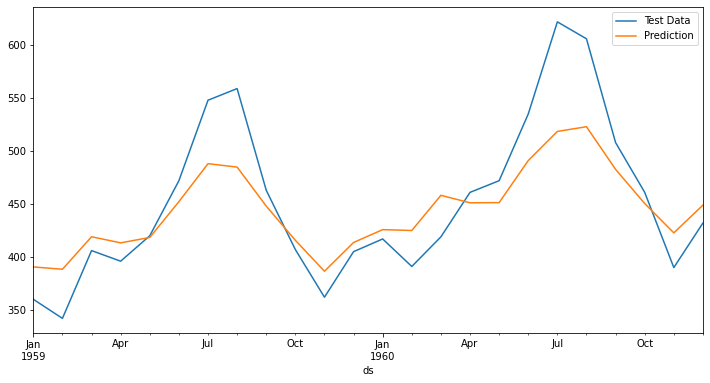

In [97]:
# Plotting Test Data and Predictions:

ax= test_data.plot(x= "ds", y= "y", label= "Test Data", legend= True, figsize= (12,6))
forecast[-24:][["ds", "yhat"]].plot(x= "ds", y= "yhat", label= "Prediction", legend= True, ax= ax)

In [98]:
np.sqrt(mean_squared_error(test_data["y"], forecast[-24:]["yhat"]))

40.28498949417411

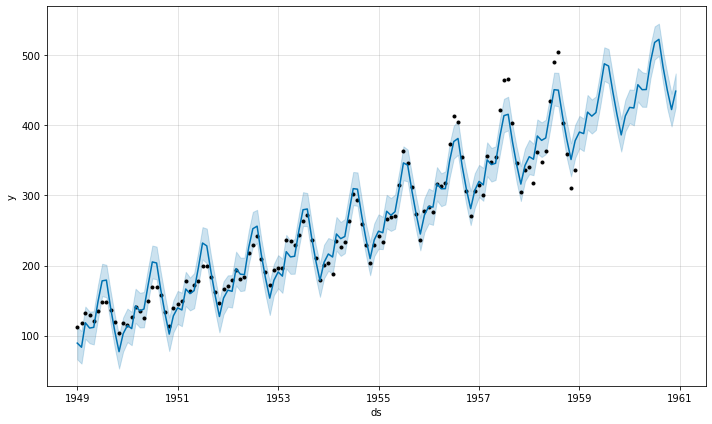

In [99]:
model1.plot(forecast);

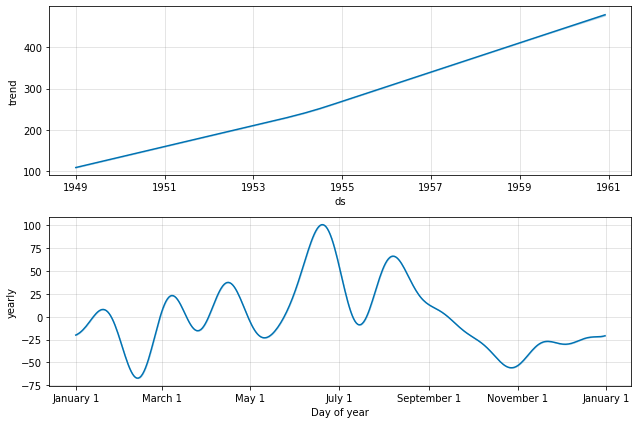

In [100]:
model1.plot_components(forecast);

### Prophet Model With Multiplicative Seasonality:

In [101]:
model2 = Prophet(seasonality_mode= "multiplicative")

In [102]:
model2.fit(train_data)

03:35:15 - cmdstanpy - INFO - Chain [1] start processing
03:35:15 - cmdstanpy - INFO - Chain [1] done processing


In [103]:
future_df = model2.make_future_dataframe(periods= 24, freq= "MS")

In [104]:
forecast = model2.predict(future_df)

In [105]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,115.722265,92.293727,116.587364,115.722265,115.722265,-0.097235,-0.097235,-0.097235,-0.097235,-0.097235,-0.097235,0.0,0.0,0.0,104.469975
1,1949-02-01,117.405465,89.121212,112.206693,117.405465,117.405465,-0.141876,-0.141876,-0.141876,-0.141876,-0.141876,-0.141876,0.0,0.0,0.0,100.748456
2,1949-03-01,118.925775,107.526292,132.436073,118.925775,118.925775,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911,0.0,0.0,0.0,119.509805
3,1949-04-01,120.608975,104.274880,129.425429,120.608975,120.608975,-0.031296,-0.031296,-0.031296,-0.031296,-0.031296,-0.031296,0.0,0.0,0.0,116.834400
4,1949-05-01,122.237878,106.353543,129.821165,122.237878,122.237878,-0.027610,-0.027610,-0.027610,-0.027610,-0.027610,-0.027610,0.0,0.0,0.0,118.862929


In [106]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
139,1960-08-01,449.972657,539.305629,565.955907,445.251807,455.158436,0.228007,0.228007,0.228007,0.228007,0.228007,0.228007,0.0,0.0,0.0,552.569690
140,1960-09-01,452.357221,462.999123,489.066905,447.246653,457.942672,0.051836,0.051836,0.051836,0.051836,0.051836,0.051836,0.0,0.0,0.0,475.805798
141,1960-10-01,454.664864,401.652429,426.981570,449.152131,460.615699,-0.088112,-0.088112,-0.088112,-0.088112,-0.088112,-0.088112,0.0,0.0,0.0,414.603543
142,1960-11-01,457.049428,351.967119,378.617966,451.189749,463.354545,-0.201382,-0.201382,-0.201382,-0.201382,-0.201382,-0.201382,0.0,0.0,0.0,365.007995
143,1960-12-01,459.357071,392.323038,418.619502,453.115050,466.123992,-0.116048,-0.116048,-0.116048,-0.116048,-0.116048,-0.116048,0.0,0.0,0.0,406.049639


In [107]:
test_data.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


<AxesSubplot:xlabel='ds'>

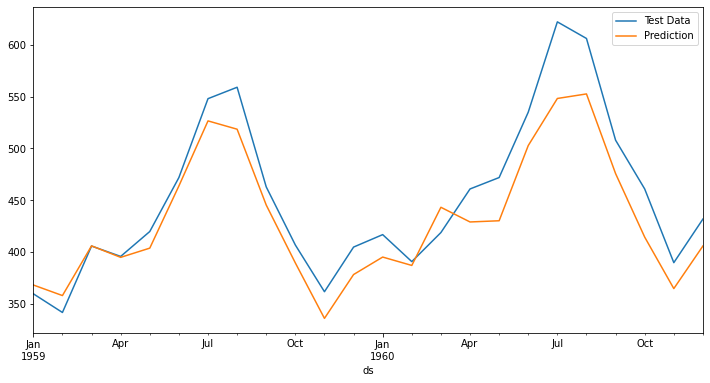

In [108]:
# Plotting Test Data and Predictions:

ax= test_data.plot(x= "ds", y= "y", label= "Test Data", legend= True, figsize= (12,6))
forecast[-24:][["ds", "yhat"]].plot(x= "ds", y= "yhat", label= "Prediction", legend= True, ax= ax)

In [109]:
np.sqrt(mean_squared_error(test_data["y"], forecast[-24:]["yhat"]))

30.523890328190248

In [110]:
# Model With Multiplicative Seasonality Works Better than Additive Seasonality.

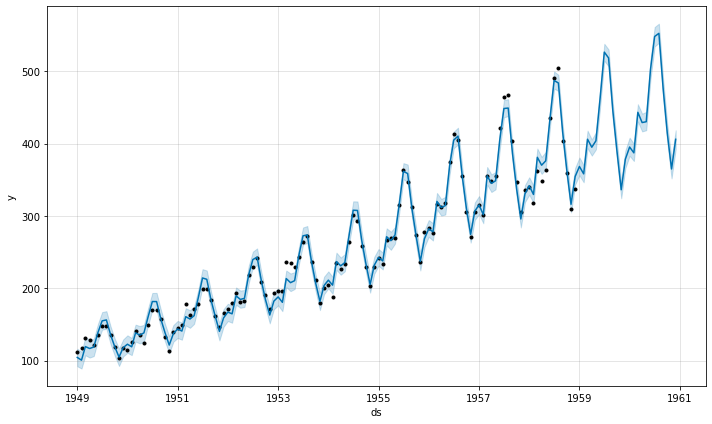

In [111]:
model2.plot(forecast);

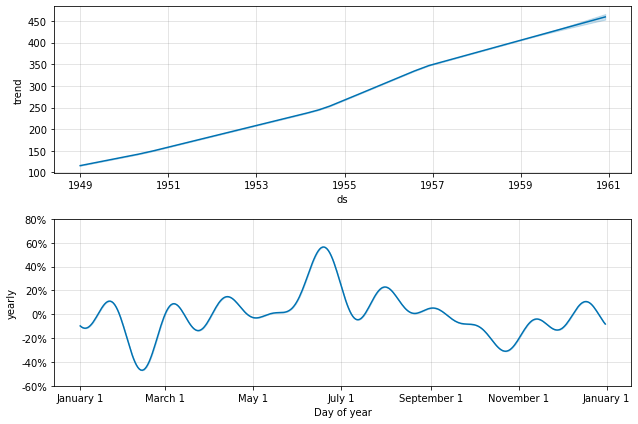

In [112]:
model2.plot_components(forecast);